**For an online store that sells computer games around the world, you need to plan your purchases for the next year and develop advertising campaigns.**  
**Let's analyze the available historical data on game sales, user and expert ratings, genres and platforms (for example, Xbox or PlayStation). Let's identify the regularities that determine the success of the game.**  
**The report and forecasts will be submitted to the marketing department for further action**



#### Data description

- `Name` — game name
- `Platform` — platform
- `Year_of_Release` — year of production
- `Genre` — game genre
- `NA_sales` — sales in North America (millions of copies sold)
- `EU_sales` - sales in Europe (millions of copies sold)
- `JP_sales` - sales in Japan (millions of copies sold)
- `Other_sales` - sales in other countries (millions of copies sold)
- `Critic_Score` - critics' score (maximum 100)
- `User_Score` - user rating (maximum 10)
- Rating is a rating from the ESRB. Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

In the data set comes the abbreviation ESRB (Entertainment Software Rating Board), which is an association that determines the age rating of computer games. The ESRB evaluates game content and assigns it an appropriate age category, such as "For adults", "For young children" or "For teens".

**Data for 2016 may not be complete**.

# What have we got here that's interesting: <a id="cell71"></a>
0. Initial table analysis
1. Complete PLT PLOT chart filling including double
2. Sorting
3. Scatter diagrams
4. Correlation
5. Sorting
5. [Sorting the Date Frame by a bunch of parameters](#cell7)
6. [Bar chart plt](#cell1)
7. [Summary table distributed by column value](#cell6)
7. [Replacing skips with a node](#cell4)
8. [Histogram with column color](#cell8)

[Change in NaN rating to 0 may be an error](#cell2)

In [1]:
import pandas as pd
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
#from pymystem3 import Mystem
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [2]:
os.getcwd()

'C:\\Users\\User\\git\\eng_i_am_data_analyst\\4_complete_project_1'

# Step 1. Let's open the data file and see general information

In [3]:
df = pd.read_csv('C:\\Users\\User\\Downloads\\games.csv')

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
print('column name')
print('___________________________________________')
display(df.columns) # column names
print('Table structure')
print('___________________________________________')
display(df.head())# table structure
print('Info')
print('___________________________________________')
display(df.info())# table composition, column format, presence of empty rows
print('Presence of null objects')
print('___________________________________________')
display(df.isnull().sum()) # presence of null objects
print('Availability of passes')
print('___________________________________________')
display(df.isna().sum())# presence of gaps
print('Availability of duplicates')
print('___________________________________________')
display(df.duplicated().sum()) # presence of duplicates

column name
___________________________________________


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'], dtype='object')

Table structure
___________________________________________


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Info
___________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Presence of null objects
___________________________________________


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Availability of passes
___________________________________________


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Availability of duplicates
___________________________________________


0

## Bottom line step 1: 
- File opens correctly structural corrections do not require

# Step 2. Prepare the data

**Rename the columns in the correct variant**

In [6]:
df = (df.rename(columns={'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release', 
                         'Genre':'genre', 'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales', 
                         'Other_sales':'other_sales', 'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating_esrb'}))

In [7]:
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Let's convert the lines to lower case**

In [8]:
for column_name in ["name", "platform", 'genre']:
    df[column_name] = df[column_name].str.lower()
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Let's remove NaN in the Year_of_Release column, they are few and will not affect the result much**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating_esrb      9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [10]:
df = df.dropna(axis='index', how='any', subset=['year_of_release'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating_esrb      9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**Remaining omissions in the critics' evaluations replace with indefinite**

In [11]:
# df = df.fillna('undefined')
# df.info()

**Заменим в столбце user_score тип данных на float**

In [12]:
df[df['user_score'] == 'tbd']
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**The abbreviation 'tbd' is To Be Determined, which means 'will definitely"**

**change 'tbd' to None since there is no rating in these cells either - otherwise it will not be formatted in float**

In [13]:
#df['user_score'] = df['user_score'].fillna()
df.loc[df['user_score'] == 'tbd', 'user_score'] = None
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb


**change the 'user_score' type from object to float since it may be necessary to calculate ratings in the future**

In [14]:
df['user_score'] = df['user_score'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating_esrb      9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [15]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [16]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Change the format of the 'year_of_release' column from float to date**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating_esrb      9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


In [18]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format = '%Y')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16444 non-null  object        
 1   platform         16446 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16444 non-null  object        
 4   na_sales         16446 non-null  float64       
 5   eu_sales         16446 non-null  float64       
 6   jp_sales         16446 non-null  float64       
 7   other_sales      16446 non-null  float64       
 8   critic_score     7983 non-null   float64       
 9   user_score       7463 non-null   float64       
 10  rating_esrb      9768 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.5+ MB


In [19]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb
0,wii sports,wii,2006-01-01,sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,nes,1985-01-01,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008-01-01,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009-01-01,sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,gb,1996-01-01,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Replace the missing values in the rating_esrb column with mode** <a id="cell4"></a>


In [20]:
# genre_rating = df.dropna().pivot_table(index='genre', values='rating_esrb', aggfunc=(lambda x: x.mode().iloc[0])).reset_index()
# #display(genre_rating)
# for i in df['genre'].unique():
#     df.loc[(df['genre'] == i) & (df['rating_esrb'].isna()), 'rating_esrb'] = (
#     genre_rating.loc[genre_rating['genre'] == i, 'rating_esrb'].values[0])
# display(genre_rating )    

**Calculate total sales in all regions and record them in a separate column.**

In [21]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb,total_sales
0,wii sports,wii,2006-01-01,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985-01-01,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008-01-01,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009-01-01,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996-01-01,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### You can use the `sum(axis=1)` method, to the columns to be summed. 


# Conclusion step 2:
- the column names need to be corrected,
- missing values in the year_of_release column were deleted, their number will not affect the result
- in the 'user_score' column 'tbd' value is replaced by None Abriver 'tbd' meaning 'To Be Determined', the column itself is converted to float format
- the strings 'name', 'platform', 'genre' are converted to lower case
- year_of_release column is converted to time format
- the gaps in the rankings have not been replaced because they do not yet affect the final result

# Step 3. Let's conduct an exploratory data analysis

### Let's see how many games were released in different years. 


In [22]:
df.head(10)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb,total_sales
0,wii sports,wii,2006-01-01,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985-01-01,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008-01-01,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009-01-01,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996-01-01,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,tetris,gb,1989-01-01,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,new super mario bros.,ds,2006-01-01,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,wii,2006-01-01,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,new super mario bros. wii,wii,2009-01-01,platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,duck hunt,nes,1984-01-01,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


,year_of_release,name
0,1980-01-01,9
1,1981-01-01,46
2,1982-01-01,36
3,1983-01-01,17
4,1984-01-01,14


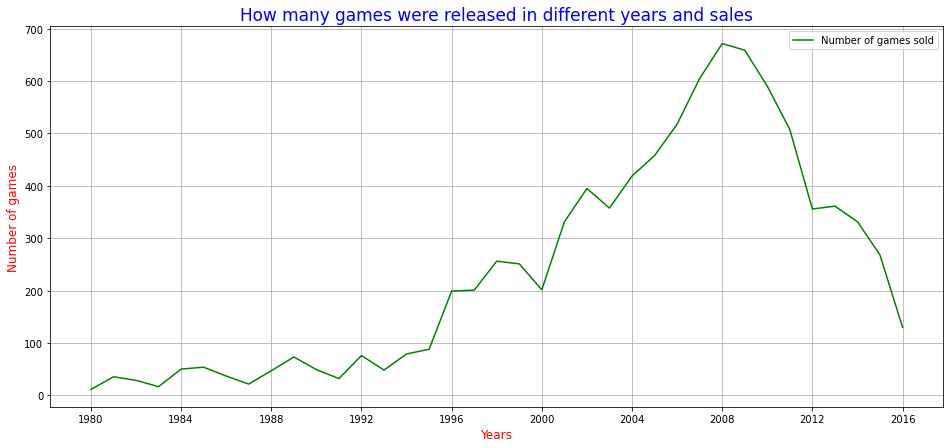

In [23]:
df_sum_games_years = df.groupby(['year_of_release']).agg({'name':'count'}).reset_index()
df_sale = (df.pivot_table(index='year_of_release', values='total_sales', aggfunc=('sum'))).reset_index()
display(df_sum_games_years.head())
plt.figure(figsize=(16, 7))
#plt.plot(df_sum_games_years['year_of_release'], df_sum_games_years['name'], '-r', label='steel price');
plt.plot(df_sale['year_of_release'], df_sale['total_sales'], '-g', label='steelad price');
plt.title('How many games were released in different years and sales', fontsize=17, color='blue')
plt.xlabel('Years',fontsize=12, color='red')
plt.ylabel('Number of games',fontsize=12, color='red')
plt.legend(['Number of games sold', 'Released titles'])
plt.grid(True)
plt.show()

**Let's check that in 1980, only 9 games were released**

In [24]:
df[df['year_of_release'] == '1980-01-01']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb,total_sales
262,asteroids,2600,1980-01-01,shooter,4.00,0.26,0.0,0.05,NaN,NaN,NaN,4.31
546,missile command,2600,1980-01-01,shooter,2.56,0.17,0.0,0.03,NaN,NaN,NaN,2.76
1764,kaboom!,2600,1980-01-01,misc,1.07,0.07,0.0,0.01,NaN,NaN,NaN,1.15
1968,defender,2600,1980-01-01,misc,0.99,0.05,0.0,0.01,NaN,NaN,NaN,1.05
2650,boxing,2600,1980-01-01,fighting,0.72,0.04,0.0,0.01,NaN,NaN,NaN,0.77
4019,ice hockey,2600,1980-01-01,sports,0.46,0.03,0.0,0.01,NaN,NaN,NaN,0.50
5360,freeway,2600,1980-01-01,action,0.32,0.02,0.0,0.00,NaN,NaN,NaN,0.34
6300,bridge,2600,1980-01-01,misc,0.25,0.02,0.0,0.00,NaN,NaN,NaN,0.27
6875,checkers,2600,1980-01-01,misc,0.22,0.01,0.0,0.00,NaN,NaN,NaN,0.23


**Let's estimate sales by year**

In [25]:
df_date = (df.pivot_table(index='year_of_release', values='total_sales', aggfunc=('sum'))).reset_index()
display(df_date.head())

,year_of_release,total_sales
0,1980-01-01,11.38
1,1981-01-01,35.68
2,1982-01-01,28.88
3,1983-01-01,16.80
4,1984-01-01,50.35


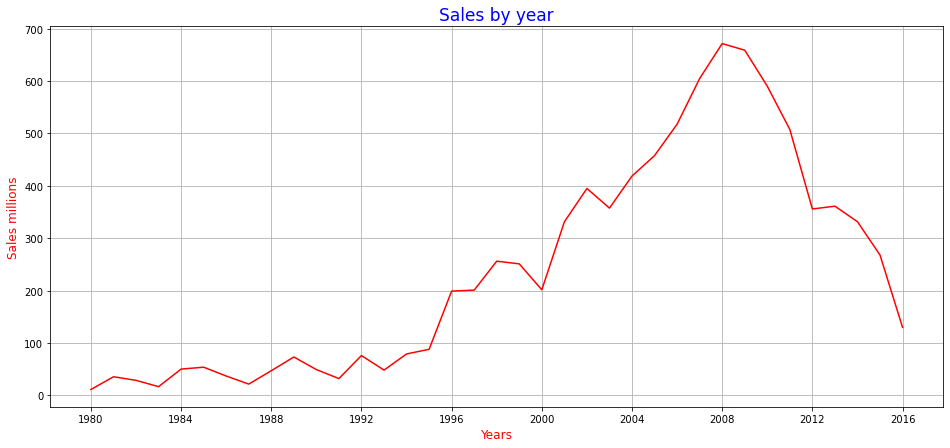

In [26]:
plt.figure(figsize=(16, 7))
plt.plot(df_date['year_of_release'], df_date['total_sales'], '-r');
plt.title('Sales by year', fontsize=17, color='blue')
plt.xlabel('Years',fontsize=12, color='red')
plt.ylabel('Sales millions',fontsize=12, color='red')
plt.grid(True)
plt.show()

**а можно  и так**

Text(0.5, 1.0, 'Sales by year')

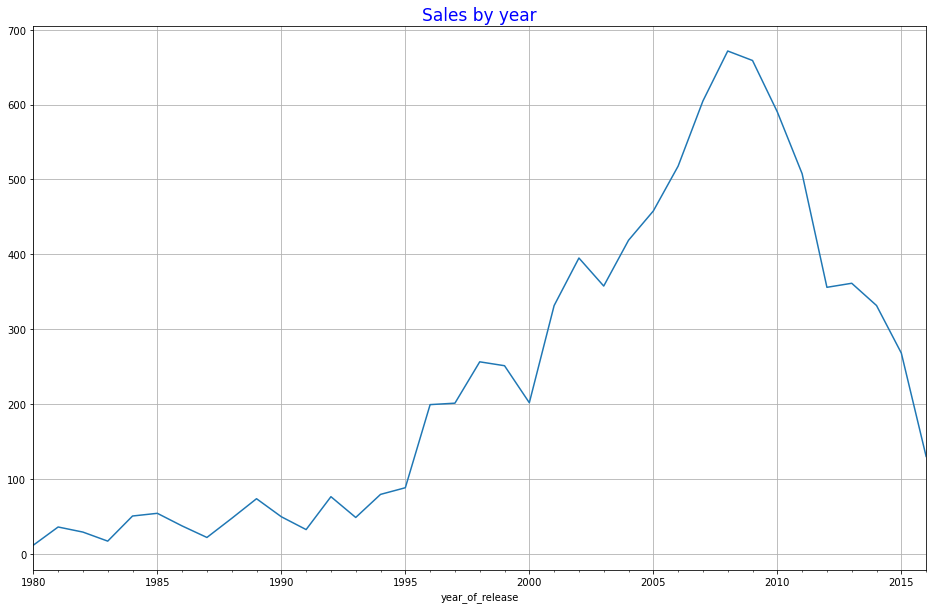

In [27]:
df.groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales', figsize=(16,10))
plt.grid(True)
plt.title('Sales by year', fontsize=17, color='blue')

### Is data for all periods important?  
- I think it makes sense to take the period where the data is most volatile from 2008 to 2016, and we will see in the data more or less modern platforms that will reflect the current reality

### Take a look at how sales by platform have changed. <a id="cell6"></a>


In [28]:
# df_sale_time_exist = pd.pivot_table(df_sale_platform, index='platform', values= 'year_of_release', aggfunc='count')
df_sale_time_exist = df.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index()
#.reset_index()
display(df_sale_time_exist.head())
#display(df_sale_time_exist['platform'].value_counts())
# df_sale_time_exist.plot(figsize=(16,10))

,platform,year_of_release,total_sales
0,2600,1980-01-01,11.38
1,2600,1981-01-01,35.68
2,2600,1982-01-01,28.88
3,2600,1983-01-01,5.84
4,2600,1984-01-01,0.27


In [29]:
df_sale_platform = pd.pivot_table(df, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
display(df_sale_platform.head())


platform,2600,3do,3ds,dc,ds,gb,gba,gc,gen,gg,n64,nes,ng,pc,pcfx,ps,ps2,ps3,ps4,psp,psv,sat,scd,snes,tg16,wii,wiiu,ws,x360,xb,xone
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980-01-01,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-01,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-01-01,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-01-01,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-01-01,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### The table can be visualized using the `heatmap` method from the `seaborn` library.


In [30]:
#import seabornborn as sns

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

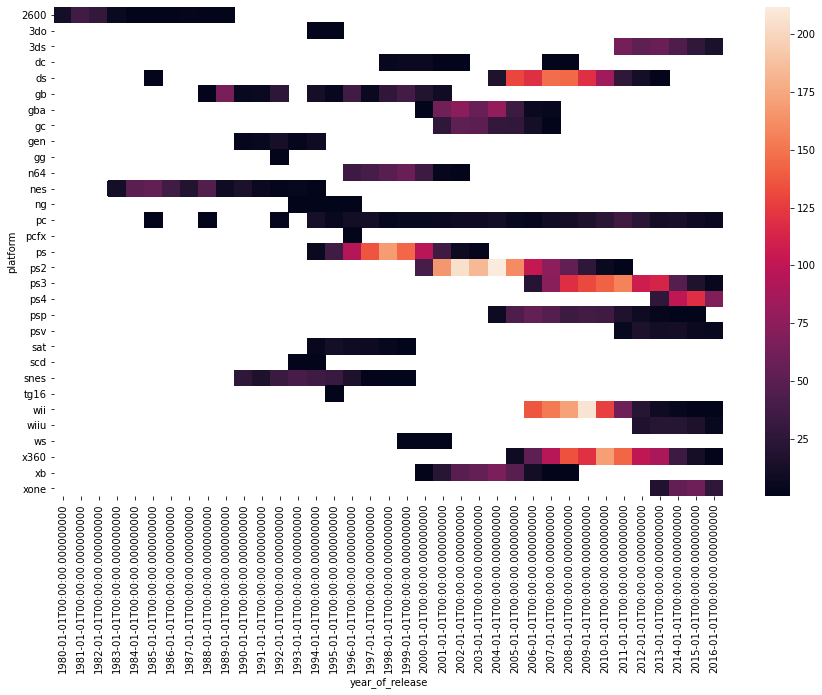

In [31]:
plt.figure(figsize=(15,9))
sns.heatmap(df_sale_platform.T)

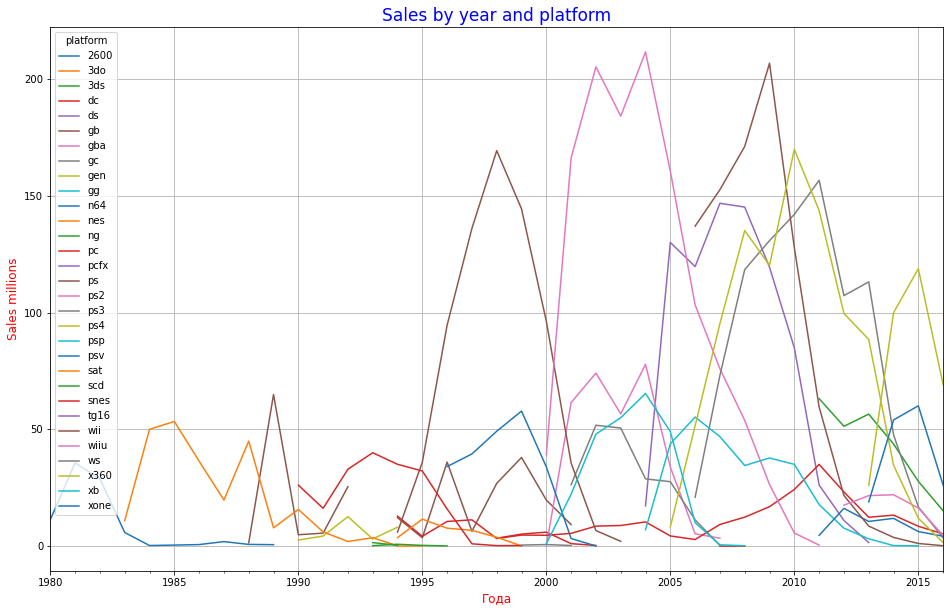

In [32]:
df_sale_platform.plot(figsize=(16,10))
plt.grid(True)
plt.xlabel('Года',fontsize=12, color='red')
plt.ylabel('Sales millions',fontsize=12, color='red')
plt.title('Sales by year and platform', fontsize=17, color='blue')
plt.show()

### Select the platforms with the highest total sales and plot the distribution by year.

In [33]:
df_more_sale_platform = pd.pivot_table(df, index='platform',values='total_sales', aggfunc='sum')
display(df_more_sale_platform.sort_values(by='total_sales', ascending=False).head(11))

,total_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.78
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


**Forming a table with the top 10 platforms by revenue** <a id="cell7"></a>

In [34]:
# time_1993 = pd.to_datetime(1993.0, format = '%Y')
# display(time_1993)
df_top10 = (df[((df['platform'] == 'ps2') | (df['platform'] == 'x360') | (df['platform'] == 'ps3') 
               | (df['platform'] == 'wii') | (df['platform'] == 'ds') | (df['platform'] == 'ps')
              | (df['platform'] == 'ps4') | (df['platform'] == 'gba') | (df['platform'] == 'psp')
              | (df['platform'] == '3ds')) & (df['year_of_release'] > '1990-01-01')])
display(df_top10.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb,total_sales
0,wii sports,wii,2006-01-01,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,mario kart wii,wii,2008-01-01,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009-01-01,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,new super mario bros.,ds,2006-01-01,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,wii,2006-01-01,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


**Let's build a histogram of the distribution of releases by year** <a id="cell8"></a>

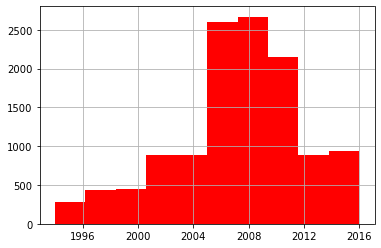

In [35]:
df_top10['year_of_release'].hist(color='r');

**Building the distribution by year** <a id="cell5"></a>

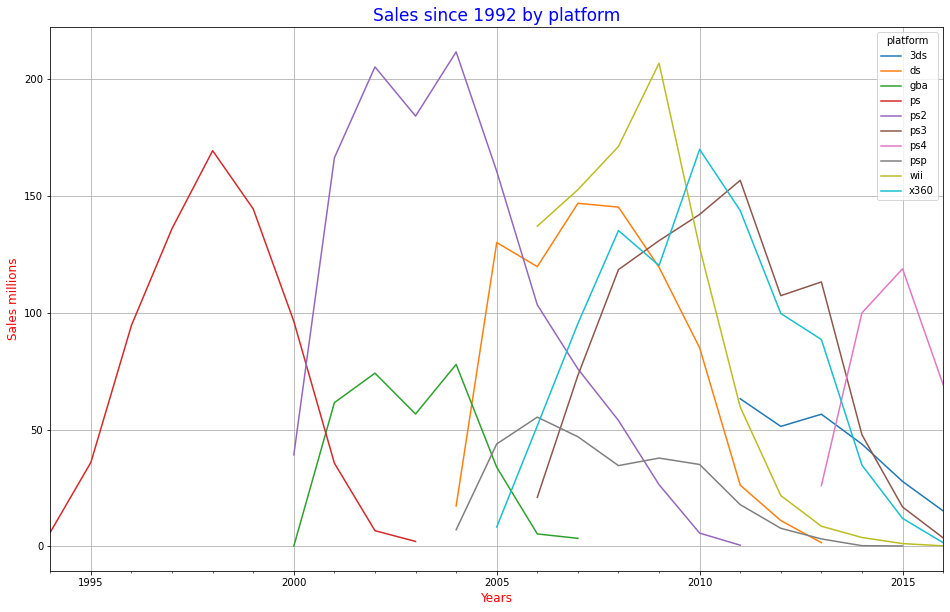

In [36]:
pd.pivot_table(df_top10 , index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(16,10))
plt.grid(True)
plt.title('Sales since 1992 by platform', fontsize=17, color='blue')
plt.xlabel('Years',fontsize=12, color='red')
plt.ylabel('Sales millions',fontsize=12, color='red')
plt.show()

### In what characteristic timeframe do new platforms appear and old ones disappear?

In [37]:
df_sale_platform_reset = df_sale_platform.reset_index()
display(df_sale_platform_reset.head())
df_sale_platform['n64'].count()
display(df_sale_platform.columns)

platform,year_of_release,2600,3do,3ds,dc,ds,gb,gba,gc,gen,gg,n64,nes,ng,pc,pcfx,ps,ps2,ps3,ps4,psp,psv,sat,scd,snes,tg16,wii,wiiu,ws,x360,xb,xone
0,1980-01-01,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1981-01-01,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1982-01-01,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1983-01-01,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1984-01-01,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Index(['2600', '3do', '3ds', 'dc', 'ds', 'gb', 'gba', 'gc', 'gen', 'gg', 'n64', 'nes', 'ng', 'pc', 'pcfx', 'ps', 'ps2', 'ps3', 'ps4', 'psp', 'psv', 'sat', 'scd', 'snes', 'tg16', 'wii', 'wiiu', 'ws', 'x360', 'xb', 'xone'], dtype='object', name='platform')

**In this table the platform and how many years it has existed**

In [38]:
arr_platform = []
arr_exist = []
for i in df_sale_platform.columns:
    arr_platform.append(i)
    arr_exist.append(df_sale_platform[i].count())
dict_platform = {"Platform": arr_platform, 'Years_exist':arr_exist}
df_sale_time_exist = pd.DataFrame(dict_platform)

display(df_sale_time_exist.sort_values(by='Years_exist', ascending=False).head(15))


,Platform,Years_exist
13,pc,26
5,gb,13
11,nes,12
28,x360,12
19,psp,12
16,ps2,12
25,wii,11
4,ds,11
17,ps3,11
0,2600,10


**It's easier that way.**

In [39]:
# df_sale_time_exist = pd.pivot_table(df_sale_platform, index='platform', values= 'year_of_release', aggfunc='count')
df_sale_time_exist_2 = df.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index()
#.reset_index()
#display(df_sale_time_exist.head(15))
display(df_sale_time_exist_2['platform'].value_counts().head())
# df_sale_time_exist.plot(figsize=(16,10))

pc     26
gb     13
nes    12
ps2    12
psp    12
Name: platform, dtype: int64

In [40]:
df_sale_time_exist['Years_exist'].describe()

count    31.000000
mean      7.677419
std       5.081910
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
Name: Years_exist, dtype: float64

In [41]:
df_sale_time_exist['Years_exist'].mode()

0    12
dtype: int64

# Conclusion : 
**- Timeframe for new platforms to appear and old ones to disappear is roughly 10-12 years, with an average of 7 years**

### We take the data for the relevant current period. The current period is defined as from 2008. 


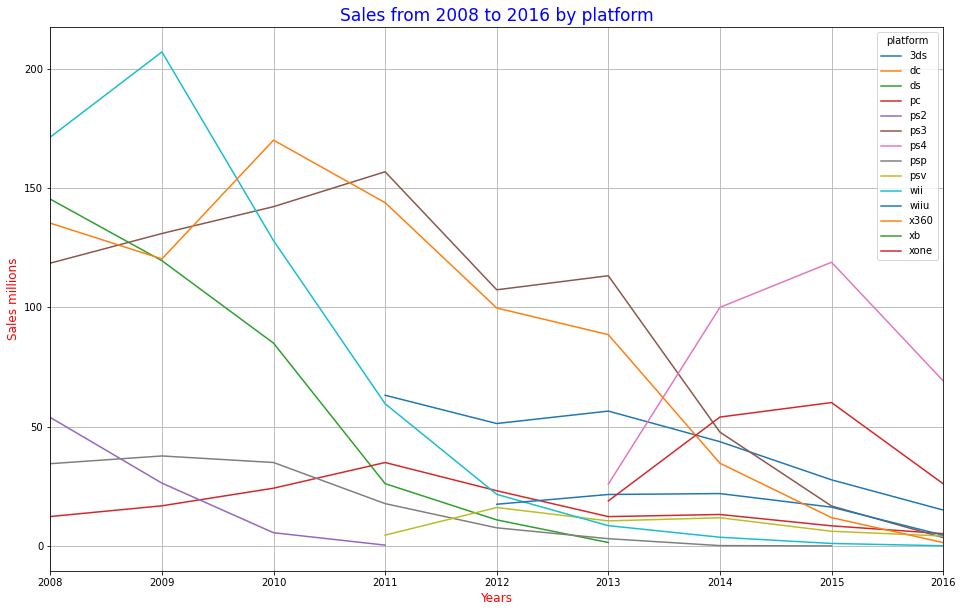

In [42]:
df_with_2008 = (df[df['year_of_release'] >='2008-01-01'])
pd.pivot_table(df_with_2008, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(16,10))
plt.grid(True)
plt.title('Sales from 2008 to 2016 by platform', fontsize=17, color='blue')
plt.xlabel('Years',fontsize=12, color='red')
plt.ylabel('Sales millions',fontsize=12, color='red')
plt.show()

### Let's see which platforms are leading in sales, rising or falling? Let's select some potentially profitable platforms.


**Turnover by platform from 2008 to 2016**

In [43]:
df_sale_with_2008 = df_with_2008.groupby(['platform']).agg({'total_sales':'sum'})
#.reset_index()
display(df_sale_with_2008.sort_values(by='total_sales', ascending=False).head(15))

,total_sales
platform,
ps3,837.19
x360,805.96
wii,601.26
ds,388.60
ps4,314.14
3ds,257.81
xone,159.32
pc,151.29
psp,136.38


In [44]:
df_sale_with_2008_v2 = (pd.pivot_table(df_with_2008 , index='platform',
                                       columns='year_of_release', values='total_sales', aggfunc='sum').reset_index())
display(df_sale_with_2008_v2)

year_of_release,platform,2008-01-01 00:00:00,2009-01-01 00:00:00,2010-01-01 00:00:00,2011-01-01 00:00:00,2012-01-01 00:00:00,2013-01-01 00:00:00,2014-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00
0,3ds,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
1,dc,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ds,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
3,pc,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25
4,ps2,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN
5,ps3,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60
6,ps4,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25
7,psp,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,NaN
8,psv,NaN,NaN,NaN,4.63,16.19,10.59,11.90,6.25,4.25
9,wii,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18


## Conclusions:
**For the most sales and therefore the most profitability we can highlight the following platforms:** 

Платформа | Общая выручка  
----------|----------  
ps3      |	837.19
x360 |805.96  
wii |	601.26
ds	|388.60
ps4	|314.14
3ds|	257.81
xone|	159.32
pc|	151.29
psp|	136.3

**Revenues of all platforms are falling as there is an overflow to mobile platforms**

### Let's build "box and whiskers" charts of global game sales by platform. 


In [45]:
print('Global sales by platform from 2008 to 2016')
print('____________________________________________________')
df_sale_with_2008_sum = df_with_2008.groupby(['platform']).agg({'total_sales':'sum'}).reset_index()
display(df_sale_with_2008_sum.reset_index().sort_values(by='platform', ascending=False))

print('Average sales by platform from 2008 to 2016')
print('____________________________________________________')
df_sale_with_2008_mean = df_with_2008.groupby(['platform']).agg({'total_sales':'mean'}).reset_index()
df_sale_with_2008_mean = df_sale_with_2008_mean.rename(columns={"total_sales": "mean"})
display(df_sale_with_2008_mean.reset_index().sort_values(by='platform', ascending=False))



print('Both by platform from 2008 to 2016')
print('____________________________________________________')
df_sale_with_2008_sum_mean = df_with_2008.groupby(['platform']).agg({'total_sales':['sum', 'mean']})
display(df_sale_with_2008_sum_mean.reset_index())

#.sort_values(by='total_sales', ascending=False)
#.reset_index()
# df_sale_with_1992_median = df.groupby(['platform']).agg({'total_sales':'median'}).reset_index()
# display(df_sale_with_1992_median)

Global sales by platform from 2008 to 2016
____________________________________________________


,index,platform,total_sales
13,13,xone,159.32
12,12,xb,0.18
11,11,x360,805.96
10,10,wiiu,82.19
9,9,wii,601.26
8,8,psv,53.81
7,7,psp,136.38
6,6,ps4,314.14
5,5,ps3,837.19
4,4,ps2,86.39


Average sales by platform from 2008 to 2016
____________________________________________________


,index,platform,mean
13,13,xone,0.645020
12,12,xb,0.180000
11,11,x360,0.807575
10,10,wiiu,0.559116
9,9,wii,0.568836
8,8,psv,0.125431
7,7,psp,0.179212
6,6,ps4,0.801378
5,5,ps3,0.704113
4,4,ps2,0.260211


Both by platform from 2008 to 2016
____________________________________________________


platform total_sales          
                    sum      mean
0       3ds      257.81  0.503535
1        dc        0.04  0.040000
2        ds      388.60  0.277175
3        pc      151.29  0.228535
4       ps2       86.39  0.260211
5       ps3      837.19  0.704113
6       ps4      314.14  0.801378
7       psp      136.38  0.179212
8       psv       53.81  0.125431
9       wii      601.26  0.568836
10     wiiu       82.19  0.559116
11     x360      805.96  0.807575
12       xb        0.18  0.180000
13     xone      159.32  0.645020

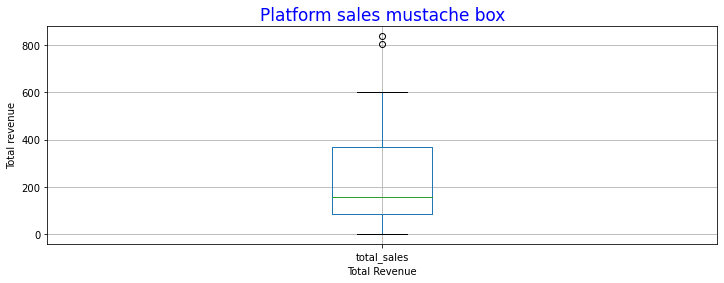

In [46]:
df_sale_with_2008_sum.boxplot('total_sales', figsize=(12,4))

plt.title('Platform sales mustache box', fontsize=17, color='blue')
plt.xlabel('Total Revenue')
plt.ylabel('Total revenue')
plt.show()

In [47]:
df_sale_with_2008_sum['total_sales'].describe()

count     14.000000
mean     276.754286
std      282.817694
min        0.040000
25%       83.240000
50%      155.305000
75%      369.985000
max      837.190000
Name: total_sales, dtype: float64

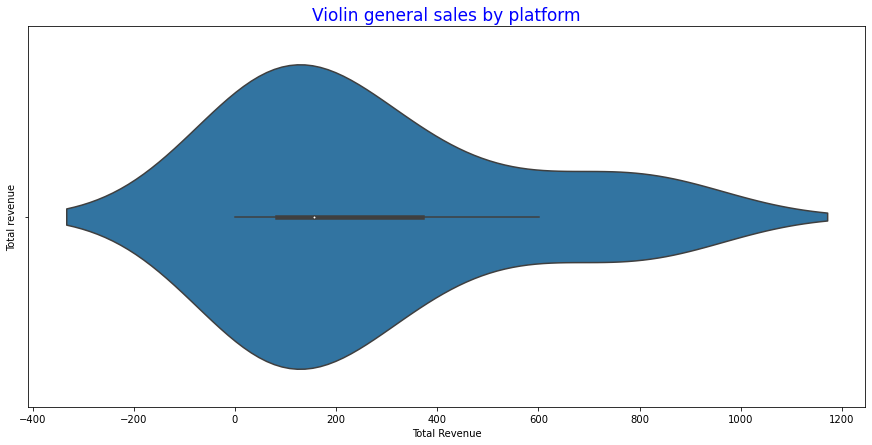

In [48]:
fig, ax = plt.subplots(figsize =(15, 7))
sns.violinplot(ax = ax, x='total_sales', data=df_sale_with_2008_sum);
plt.title('Violin general sales by platform', fontsize=17, color='blue')
plt.ylabel('Total revenue')
plt.xlabel('Total Revenue')
plt.show()

In [49]:
display(df_sale_with_2008_sum.isnull().sum())

platform       0
total_sales    0
dtype: int64

In [50]:
df_sale_with_2008_sum[df_sale_with_2008_sum['total_sales']<0]

,platform,total_sales


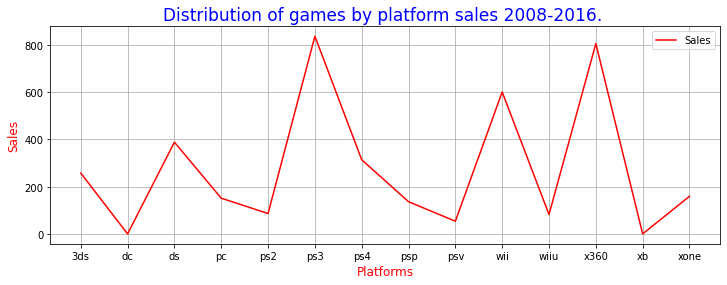

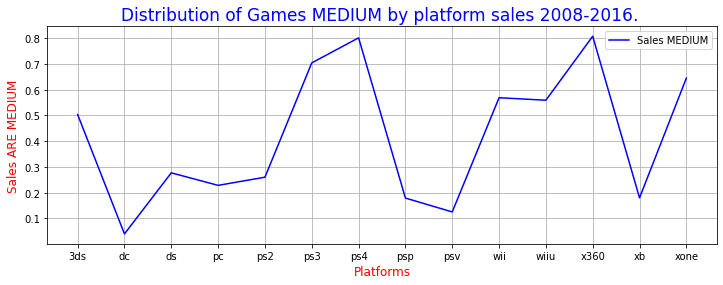

In [51]:
plt.figure(figsize=(12, 4))
plt.plot(df_sale_with_2008_sum['platform'], df_sale_with_2008_sum['total_sales'], '-r', label='steel price');
#plt.plot(df_genre_reting['genre'], df_genre_reting['name_count'], '-g', label='steelad price');
plt.title('Distribution of games by platform sales 2008-2016. ', fontsize=17, color='blue')
plt.xlabel('Platforms',fontsize=12, color='red')
plt.ylabel('Sales',fontsize=12, color='red')
plt.legend(['Sales'])
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(df_sale_with_2008_mean['platform'], df_sale_with_2008_mean['mean'], '-b', label='steel price');
#plt.plot(df_genre_reting['genre'], df_genre_reting['name_count'], '-g', label='steelad price');
plt.title('Distribution of Games MEDIUM by platform sales 2008-2016. ', fontsize=17, color='blue')
plt.xlabel('Platforms',fontsize=12, color='red')
plt.ylabel('Sales ARE MEDIUM',fontsize=12, color='red')
plt.legend(['Sales MEDIUM'])
plt.grid(True)
plt.show()

# Conclusion:
- Global game sales data by platform is very scattered, with almost all of the most profitable projects with high revenue being outside the whiskers in the emission zone. 
- the difference in average sales is also large
- the first three platforms lead by a very wide margin

### Let's take a look at how sales within one popular platform are affected by user reviews and critics. Let's build a scatter plot and calculate the correlation between reviews and sales. 


In [52]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb,total_sales
0,wii sports,wii,2006-01-01,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985-01-01,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008-01-01,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009-01-01,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996-01-01,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


*In the column user_score and 'critic_score' we see the missing values, replace them with 0 in order to see them on the rating in 'rating_esrb' fill the values with 'not defined' 'tbd'*<a id="cell2"></a>

In [53]:
df['user_score'] = df['user_score'].fillna(0)
df['critic_score'] = df['critic_score'].fillna(0)
df['rating_esrb'] = df['rating_esrb'].fillna('tbd')
df.info()
# df['user_score'] = df['user_score'].fillna('tbd' )
# df['critic_score'] = df['critic_score'].fillna('tbd')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16444 non-null  object        
 1   platform         16446 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16444 non-null  object        
 4   na_sales         16446 non-null  float64       
 5   eu_sales         16446 non-null  float64       
 6   jp_sales         16446 non-null  float64       
 7   other_sales      16446 non-null  float64       
 8   critic_score     16446 non-null  float64       
 9   user_score       16446 non-null  float64       
 10  rating_esrb      16446 non-null  object        
 11  total_sales      16446 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 1.6+ MB


In [54]:
df_pc = df[df['platform'] == 'pc']
display(df_pc.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb,total_sales
85,the sims 3,pc,2009-01-01,simulation,0.99,6.42,0.0,0.60,86.0,7.6,T,8.01
138,world of warcraft,pc,2004-01-01,role-playing,0.08,6.21,0.0,0.00,93.0,7.3,T,6.29
192,diablo iii,pc,2012-01-01,role-playing,2.44,2.16,0.0,0.54,88.0,4.0,M,5.14
195,microsoft flight simulator,pc,1996-01-01,simulation,3.22,1.69,0.0,0.20,0.0,0.0,tbd,5.11
218,starcraft ii: wings of liberty,pc,2010-01-01,strategy,2.57,1.68,0.0,0.58,93.0,8.2,T,4.83


In [55]:
df_pc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 85 to 16705
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             957 non-null    object        
 1   platform         957 non-null    object        
 2   year_of_release  957 non-null    datetime64[ns]
 3   genre            957 non-null    object        
 4   na_sales         957 non-null    float64       
 5   eu_sales         957 non-null    float64       
 6   jp_sales         957 non-null    float64       
 7   other_sales      957 non-null    float64       
 8   critic_score     957 non-null    float64       
 9   user_score       957 non-null    float64       
 10  rating_esrb      957 non-null    object        
 11  total_sales      957 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 97.2+ KB


In [56]:
df_pc_scatter_matrix =df_pc[['total_sales', 'critic_score', 'user_score']]
display(df_pc_scatter_matrix.head())

,total_sales,critic_score,user_score
85,8.01,86.0,7.6
138,6.29,93.0,7.3
192,5.14,88.0,4.0
195,5.11,0.0,0.0
218,4.83,93.0,8.2


Платформа PC
              total_sales  critic_score  user_score
total_sales      1.000000      0.079607    0.008723
critic_score     0.079607      1.000000    0.736947
user_score       0.008723      0.736947    1.000000

Платформа PC


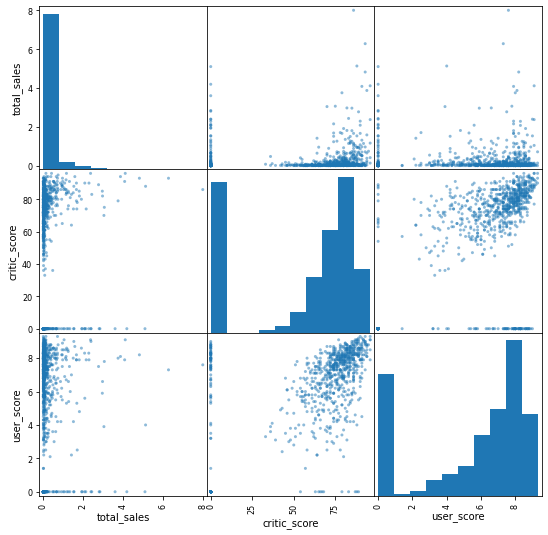

In [57]:
print('Платформа PC')
print(df_pc_scatter_matrix.corr())
print()
print('Платформа PC')
pd.plotting.scatter_matrix(df_pc_scatter_matrix, figsize=(9, 9), grid=True);


## Conclusions.
### - Significant correlation coefficients start from about 0.6 (modulo). Anything below that is not correlated.
- it can be seen that there is a correlation between user ratings and critics' ratings
- there is no significant correlation between the estimates and the level of sales

### Let's relate the findings to game sales on other platforms.



Платформа PS-2
              total_sales  critic_score  user_score
total_sales      1.000000      0.300953    0.263918
critic_score     0.300953      1.000000    0.805929
user_score       0.263918      0.805929    1.000000


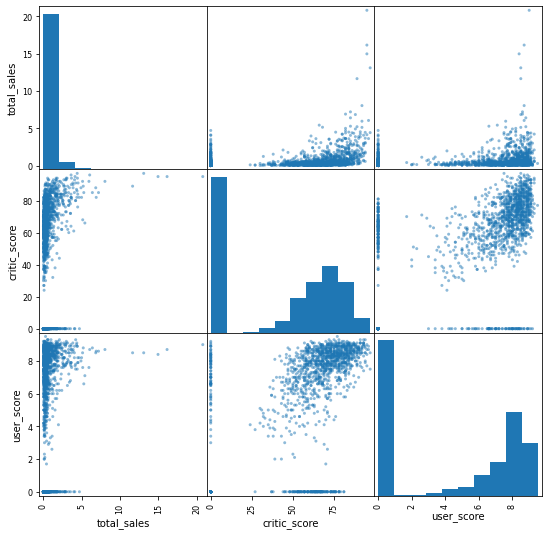

In [58]:
df_ps2 = df.query('platform == "ps2"')[['total_sales', 'critic_score', 'user_score']]
print()
print('Платформа PS-2')
pd.plotting.scatter_matrix(df_ps2, figsize=(9, 9), grid=True);
print(df_ps2.corr())


X-360 platform
              total_sales  critic_score  user_score
total_sales      1.000000      0.311756    0.207806
critic_score     0.311756      1.000000    0.790158
user_score       0.207806      0.790158    1.000000


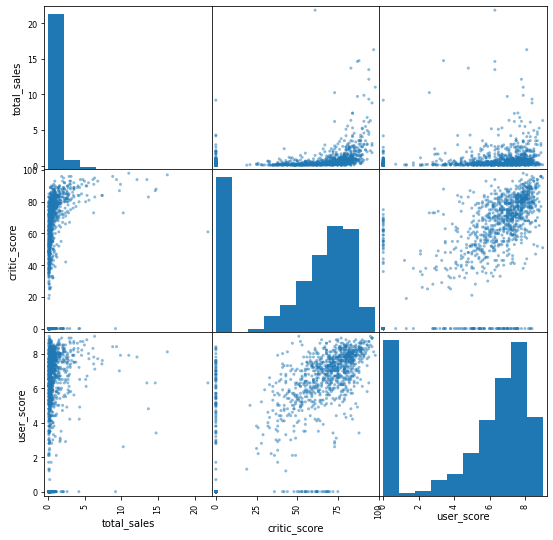

In [59]:
df_x360 = df.query('platform == "x360"')[['total_sales', 'critic_score', 'user_score']]
print()
print('X-360 platform')
pd.plotting.scatter_matrix(df_x360, figsize=(9, 9), grid=True);
print(df_x360.corr())


Платформа PS-3
              total_sales  critic_score  user_score
total_sales      1.000000      0.355146    0.274583
critic_score     0.355146      1.000000    0.823076
user_score       0.274583      0.823076    1.000000


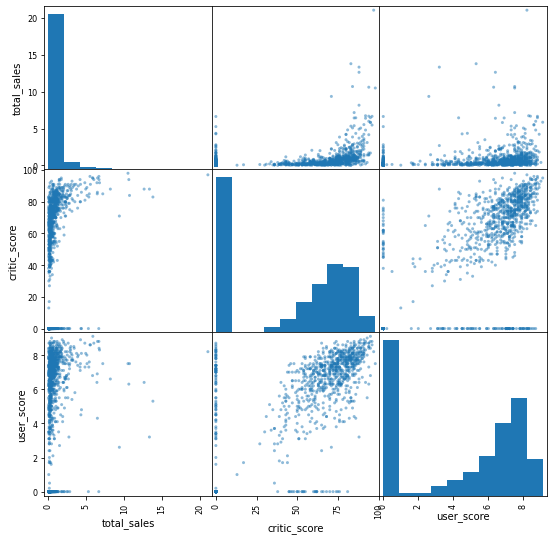

In [60]:
df_ps3 = df.query('platform == "ps3"')[['total_sales', 'critic_score', 'user_score']]
print()
print('Платформа PS-3')
pd.plotting.scatter_matrix(df_ps3, figsize=(9, 9), grid=True);
print(df_ps3.corr())

## Conclusions.
### - Data on other platforms is similar.
- it can be seen that there is a correlation between user ratings and critics' ratings
- there is a correlation between grades and sales but a very small one.

#### Let's look at the overall distribution of games by genre and revenue. 

In [61]:
df.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb,total_sales
0,wii sports,wii,2006-01-01,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985-01-01,platform,29.08,3.58,6.81,0.77,0.0,0.0,tbd,40.24


In [62]:
df['genre'].value_counts()

action          3307
sports          2306
misc            1721
role-playing    1481
shooter         1296
adventure       1293
racing          1226
platform         878
simulation       857
fighting         837
strategy         673
puzzle           569
Name: genre, dtype: int64

In [63]:
df_genre_reting = (df.groupby(['genre']).agg({'total_sales':'sum', 'name':'count'})
                   .sort_values(by='total_sales', ascending=False))
                   
#.sort_values(by='total_sales', ascending=False)
df_genre_reting = df_genre_reting.rename(columns={'name':'name_count'})
df_genre_reting = df_genre_reting.reset_index()
#df_genre_reting = df_genre_reting.sort_values(by='count', ascending=False)
display(df_genre_reting)
#.plot(kind='hist', bins=20, y='genre', figsize=(16,10));

,genre,total_sales,name_count
0,action,1716.52,3307
1,sports,1309.67,2306
2,shooter,1041.36,1296
3,role-playing,931.08,1481
4,platform,825.55,878
5,misc,790.29,1721
6,racing,723.49,1226
7,fighting,442.66,837
8,simulation,387.96,857
9,puzzle,239.89,569


**let's add a column for how many of each genre's releases sold**

In [64]:
df_genre_reting['total_sales_millon'] = (df_genre_reting['total_sales']*7)//1
df_genre_reting['total_sales_millon2'] = (df_genre_reting['total_sales']*1000000)//1
df_genre_reting['profit_one_box'] = (df_genre_reting['total_sales_millon2']/df_genre_reting['name_count'])//1
display(df_genre_reting.head(6))

,genre,total_sales,name_count,total_sales_millon,total_sales_millon2,profit_one_box
0,action,1716.52,3307,12015.0,1.716520e+09,519056.0
1,sports,1309.67,2306,9167.0,1.309670e+09,567940.0
2,shooter,1041.36,1296,7289.0,1.041360e+09,803518.0
3,role-playing,931.08,1481,6517.0,9.310800e+08,628683.0
4,platform,825.55,878,5778.0,8.255500e+08,940261.0
5,misc,790.29,1721,5532.0,7.902900e+08,459203.0


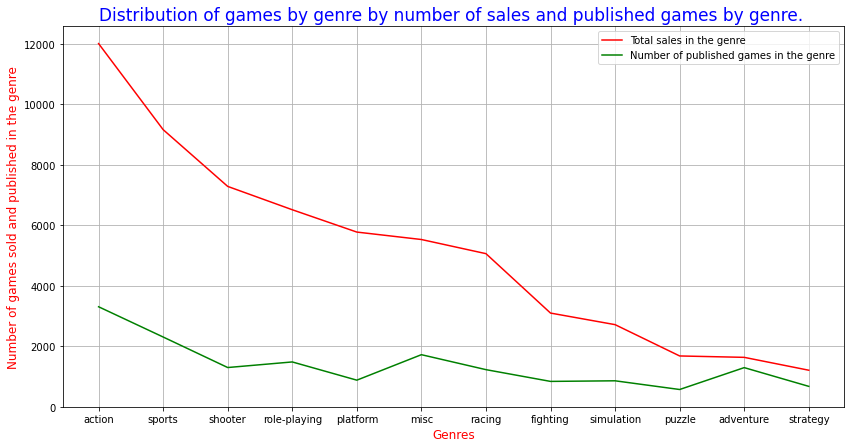

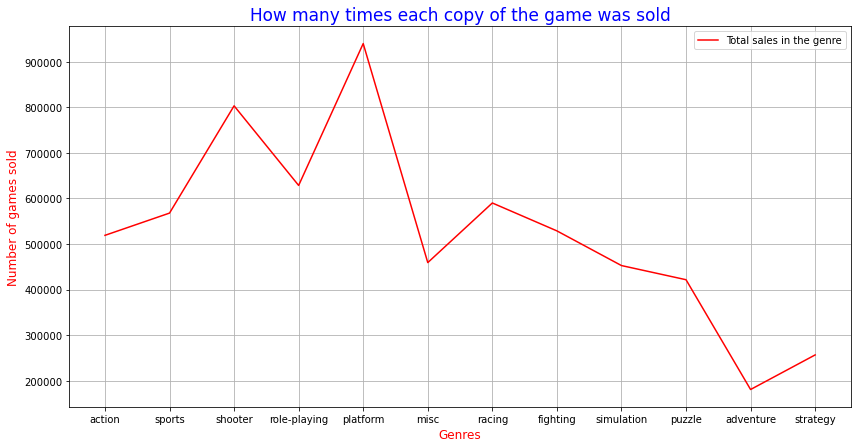

In [65]:
plt.figure(figsize=(14, 7))
plt.plot(df_genre_reting['genre'], df_genre_reting['total_sales_millon'], '-r', label='steel price');
plt.plot(df_genre_reting['genre'], df_genre_reting['name_count'], '-g', label='steelad price');
plt.title('Distribution of games by genre by number of sales and published games by genre. ', fontsize=17, color='blue')
plt.xlabel('Genres',fontsize=12, color='red')
plt.ylabel('Number of games sold and published in the genre',fontsize=12, color='red')
plt.legend(['Total sales in the genre', 'Number of published games in the genre'])
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(df_genre_reting['genre'], df_genre_reting['profit_one_box'], '-r', label='steel price');
#plt.plot(df_genre_reting['genre'], df_genre_reting['name_count'], '-g', label='steelad price');
plt.title('How many times each copy of the game was sold', fontsize=17, color='blue')
plt.xlabel('Genres',fontsize=12, color='red')
plt.ylabel('Number of games sold',fontsize=12, color='red')
plt.legend(['Total sales in the genre', 'Number of published games in the genre'])
plt.grid(True)
plt.show()

# Conclusion step 3:
**- The most profitable genres:**

In [66]:
display(df_genre_reting.head(6))

,genre,total_sales,name_count,total_sales_millon,total_sales_millon2,profit_one_box
0,action,1716.52,3307,12015.0,1.716520e+09,519056.0
1,sports,1309.67,2306,9167.0,1.309670e+09,567940.0
2,shooter,1041.36,1296,7289.0,1.041360e+09,803518.0
3,role-playing,931.08,1481,6517.0,9.310800e+08,628683.0
4,platform,825.55,878,5778.0,8.255500e+08,940261.0
5,misc,790.29,1721,5532.0,7.902900e+08,459203.0


**- Genres that are easier for users to master sell better action, sports, shooter as opposed to adventure, strategy**  
**- Also from the chart 'How many times each copy of the game was sold' we can see that there are genres that are ahead of the general sales leaders in terms of number per copy, but this is rather important for game producers, in which area to start game development to get the maximum profit per copy from our graph we see that it is most profitable to develop platformers (Mario rules at all times :)))**)

# Step 4. Let's draw up a portrait of a user of each region
### Define for the user each region (NA, EU, JP): 
**- Most popular platforms (top 5). Describe the differences in sales shares.**

In [67]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb,total_sales
0,wii sports,wii,2006-01-01,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985-01-01,platform,29.08,3.58,6.81,0.77,0.0,0.0,tbd,40.24
2,mario kart wii,wii,2008-01-01,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009-01-01,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996-01-01,role-playing,11.27,8.89,10.22,1.00,0.0,0.0,tbd,31.38


In [68]:
df_user_na_platform = df.groupby(['platform']).agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales', ascending=False).head(5)
#.sort_values(by='total_sales', ascending=False)
print('TOP5 North America')
display(df_user_na_platform)

df_user_eu_platform = df.groupby(['platform']).agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False).head(5)
#.sort_values(by='total_sales', ascending=False)
print('______________________________')
print('TOP5 Europe')
display(df_user_eu_platform)

df_user_jp_platform = df.groupby(['platform']).agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False).head(5)
#.sort_values(by='total_sales', ascending=False)
print('______________________________')
print('TOP5 Japan')
display(df_user_jp_platform.head(5))

df_user_other_platform = df.groupby(['platform']).agg({'other_sales':'sum'}).reset_index().sort_values(by='other_sales', ascending=False).head(5)
#.sort_values(by='total_sales', ascending=False)
print('______________________________')
print('TOP5 Other countries')
display(df_user_other_platform.head(5))


TOP5 North America


,platform,na_sales
28,x360,595.74
16,ps2,572.92
25,wii,486.87
17,ps3,390.13
4,ds,380.31


______________________________
TOP5 Europe


,platform,eu_sales
16,ps2,332.63
17,ps3,327.21
28,x360,268.32
25,wii,258.32
15,ps,212.39


______________________________
TOP5 Japan


,platform,jp_sales
4,ds,175.02
15,ps,139.78
16,ps2,137.54
23,snes,116.55
2,3ds,100.62


______________________________
TOP5 Other countries


,platform,other_sales
16,ps2,190.47
17,ps3,134.59
28,x360,84.88
25,wii,77.71
4,ds,59.04


<a id="cell1"></a>**color**-RGB is a way of making colors. You have to to provide an amount of red, green and blue + the transparency and it returns a color.  
палитра https://csscolor.ru/?hex=f50a19

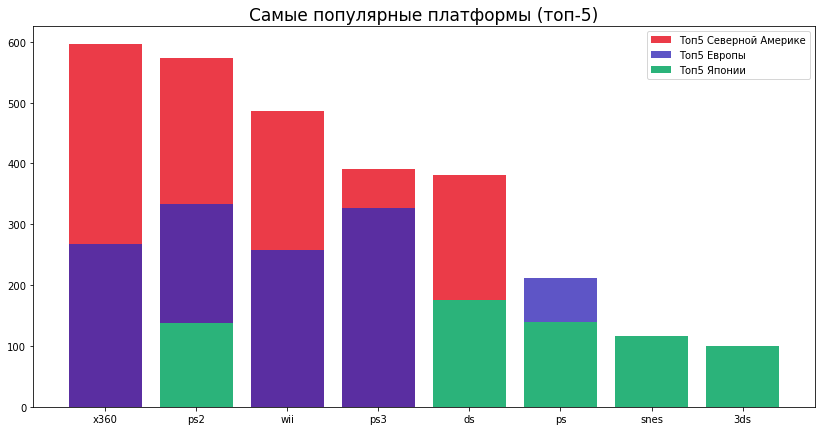

In [69]:
#fig, ax = plt.subplots()
plt.figure(figsize=(14, 7))
plt.bar(df_user_na_platform['platform'], df_user_na_platform['na_sales'], color=(0.9, 0.04, 0.1, 0.8))
plt.bar(df_user_eu_platform['platform'], df_user_eu_platform['eu_sales'], color=(0.21, 0.17, 0.72, 0.8))
plt.bar(df_user_jp_platform['platform'], df_user_jp_platform['jp_sales'], color=(0.17, 0.7, 0.48, 1))
plt.title('Самые популярные платформы (топ-5)', fontsize=17, color='black')
plt.legend([ 'Топ5 Северной Америке', 'Топ5 Европы', 'Топ5 Японии'])
plt.show()


### Most popular genres (top 5).


In [70]:
df_user_na_genre = df.groupby(['genre']).agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales', ascending=False).head(5)
#.sort_values(by='total_sales', ascending=False)
print('TOP5 North America')
display(df_user_na_genre.head(5))

df_user_eu_genre = df.groupby(['genre']).agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False).head(5)
#.sort_values(by='total_sales', ascending=False)
print('______________________________')
print('TOP5 Europe')
display(df_user_eu_genre.head(5))

df_user_jp_genre = df.groupby(['genre']).agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False).head(5)
#.sort_values(by='total_sales', ascending=False)
print('______________________________')
print('TOP5 Japan')
display(df_user_jp_genre.head(5))

df_user_other_genre = df.groupby(['genre']).agg({'other_sales':'sum'}).reset_index().sort_values(by='other_sales', ascending=False).head(5)
#.sort_values(by='total_sales', ascending=False)
print('______________________________')
print('TOP5 Other countries')
display(df_user_other_genre)

TOP5 North America


,genre,na_sales
0,action,863.17
10,sports,671.20
8,shooter,584.83
4,platform,444.44
3,misc,399.57


______________________________
TOP5 Europe


,genre,eu_sales
0,action,510.99
10,sports,371.33
8,shooter,314.52
6,racing,234.49
3,misc,210.60


______________________________
TOP5 Japan


,genre,jp_sales
7,role-playing,353.39
0,action,160.14
10,sports,134.93
4,platform,130.71
3,misc,107.02


______________________________
TOP5 Other countries


,genre,other_sales
0,action,182.22
10,sports,132.21
8,shooter,103.33
6,racing,75.51
3,misc,73.10


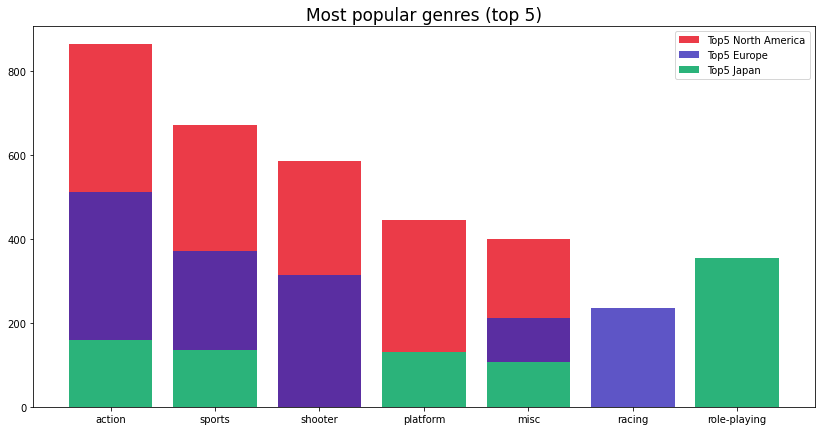

In [71]:
plt.figure (figsize = (14, 7))
plt.bar (df_user_na_genre ['genre'], df_user_na_genre ['na_sales'], color = (0.9, 0.04, 0.1, 0.8))
plt.bar (df_user_eu_genre ['genre'], df_user_eu_genre ['eu_sales'], color = (0.21, 0.17, 0.72, 0.8))
plt.bar (df_user_jp_genre ['genre'], df_user_jp_genre ['jp_sales'], color = (0.17, 0.7, 0.48, 1))
plt.title ('Most popular genres (top 5)', fontsize = 17, color = 'black')
plt.legend (['Top5 North America', 'Top5 Europe', 'Top5 Japan'])
plt.show ()

### ** - Describe the differences in sales shares Does the ESRB rating affect sales in a particular region? **
1. **"EC"** ("Early childhood") - "For young children":
2. **"E"** ("Everyone") - "For all"
3. **"E10 +"** ("Everyone 10 and older") - "For everyone 10 and older"
4. **"T"** ("Teen") - "Teenagers"
5. **"M"** ("Mature") - "For adults"
6. **"AO"** ("Adults Only 18+") - "Only for adults"
7. **"K-A"** for Kids to Adults: Games that contain content that is suitable for a general audience. This rating was used until the year 1998 when it renamed to E.

In [72]:
df_user_na_ESRB = df.groupby(['rating_esrb']).agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales', ascending=False).head(5)
#.sort_values(by='total_sales', ascending=False)
print('______________________________')
print('TOP5 North America')
display(df_user_na_ESRB)

df_user_eu_ESRB = df.groupby(['rating_esrb']).agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False).head(5)
#.sort_values(by='total_sales', ascending=False)
print('______________________________')
print('TOP5 Europe')
display(df_user_eu_ESRB)

df_user_jp_ESRB = df.groupby(['rating_esrb']).agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False).head(5)
#.sort_values(by='total_sales', ascending=False)
print('______________________________')
print('TOP5 Japan')
display(df_user_jp_ESRB)

df_user_other_ESRB = df.groupby(['rating_esrb']).agg({'other_sales':'sum'}).reset_index().sort_values(by='other_sales', ascending=False).head(5)
#.sort_values(by='total_sales', ascending=False)
print('______________________________')
print('TOP5 Other countries')
display(df_user_other_ESRB)


______________________________
TOP5 North America


,rating_esrb,na_sales
1,E,1274.24
8,tbd,1227.62
7,T,747.60
5,M,742.89
2,E10+,345.50


______________________________
TOP5 Europe


,rating_esrb,eu_sales
1,E,703.87
8,tbd,610.18
5,M,480.00
7,T,421.79
2,E10+,183.35


______________________________
TOP5 Japan


,rating_esrb,jp_sales
8,tbd,836.77
1,E,197.96
7,T,150.70
5,M,63.58
2,E10+,40.20


______________________________
TOP5 Other countries


,rating_esrb,other_sales
1,E,231.54
5,M,176.06
7,T,152.99
8,tbd,149.95
2,E10+,71.93


### Does ESRB rating affect sales in a particular region?
## Output:
- In each individual region, the ESRB rating has practically no effect on sales; the sales leaders in the regions are games with the same ratings, the more accessible the rating is, the more sold the game

# Step 5. Test hypotheses
### - Average user ratings for Xbox One and PC platforms are the same;


In [73]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb,total_sales
0,wii sports,wii,2006-01-01,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985-01-01,platform,29.08,3.58,6.81,0.77,0.0,0.0,tbd,40.24
2,mario kart wii,wii,2008-01-01,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009-01-01,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996-01-01,role-playing,11.27,8.89,10.22,1.00,0.0,0.0,tbd,31.38


**Проверяем так ли это на самом деле**

In [74]:
print ('Xbox One Average User Rating =', round (df.query ('platform == "x360"') ['user_score']. mean (), 2))
print ('Average user score PC =', round (df.query ('platform == "pc"') ['user_score']. mean (), 2))

Xbox One Average User Rating = 5.12
Average user score PC = 5.57


In [75]:
df.query('platform == "x360"')['user_score'].describe()

count    1232.000000
mean        5.124432
std         3.095257
min         0.000000
25%         2.900000
50%         6.400000
75%         7.500000
max         9.000000
Name: user_score, dtype: float64

In [76]:
df.query('platform == "pc"')['user_score'].describe()

count    957.000000
mean       5.574504
std        3.189932
min        0.000000
25%        3.800000
50%        6.900000
75%        8.000000
max        9.300000
Name: user_score, dtype: float64

<div class = "alert alert-success" role = "alert">
  <strong> Testing the two-sided hypothesis that the average user ratings for the Xbox One and PC platforms are the same; check on the full population </strong>
    
    - We form a null and alternative hypothesis based on the task:
    Null Hypothesis: Since the Null Hypothesis is always formulated to use the equal sign
    Then we formulate it like this:
                               the average user ratings for the Xbox One and PC platforms are equal;
    Based on the null hypothesis
    Alternative hypothesis:
                               the average user ratings of the Xbox One and PC platforms are not equal;
</div>

In [77]:
alpha = .05 # critical level of statistical significance
            # if the p-value is less than it, we reject the hypothesis

results = st.ttest_ind (
    df.query ('platform == "x360"') ['user_score'],
    df.query ('platform == "pc"') ['user_score'])

print ('p-value:', results.pvalue)

if (results.pvalue <alpha):
    print ("Rejecting the null hypothesis")
else:
    print ("Failed to reject the null hypothesis")

p-value: 0.0008837936251302942
Rejecting the null hypothesis


### - The average user ratings of the Action and Sports genres are different.

**We check if this is really so**

In [78]:
display(df.query('genre == "action"')['user_score'].describe())
display(df.query('genre == "sports"')['user_score'].describe())

count    3307.000000
mean        3.833202
std         3.669655
min         0.000000
25%         0.000000
50%         4.800000
75%         7.500000
max         9.500000
Name: user_score, dtype: float64

count    2306.000000
mean        3.258673
std         3.642492
min         0.000000
25%         0.000000
50%         0.000000
75%         7.200000
max         9.500000
Name: user_score, dtype: float64

**We see that there are a lot of zeros, above all missing values ​​were replaced with zeros, we will try to cancel**

In [79]:
df_genre_sports = df.query('genre == "sports"')
display(df_genre_sports[df_genre_sports['user_score'] == 0].head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb,total_sales
86,mario & sonic at the olympic games,wii,2007-01-01,sports,2.57,3.86,0.66,0.91,0.0,0.0,tbd,8.00
119,zumba fitness,wii,2010-01-01,sports,3.45,2.59,0.00,0.66,0.0,0.0,E,6.70
122,fifa 12,ps3,2011-01-01,sports,0.84,4.30,0.11,1.39,0.0,0.0,tbd,6.64
198,mario & sonic at the olympic games,ds,2008-01-01,sports,1.63,2.45,0.44,0.57,0.0,0.0,tbd,5.09
237,mario & sonic at the olympic winter games,wii,2009-01-01,sports,1.87,1.96,0.22,0.48,0.0,0.0,tbd,4.53


**the result did not change so returned the replacement with zeros**

In [80]:
print ('Average user rating of the genre Action =', round (df.query ('genre == "action"') ['user_score']. mean (), 2))
print ('Average user rating for genre Sports =', round (df.query ('genre == "sports"') ['user_score']. mean (), 2))

Average user rating of the genre Action = 3.83
Average user rating for genre Sports = 3.26


<div class = "alert alert-success" role = "alert">
  <strong> Testing the two-sided hypothesis that the average user ratings for the Xbox One and PC platforms are the same; check on the full population </strong>
    
    - We form a null and alternative hypothesis based on the task:
    Null Hypothesis: Since the Null Hypothesis is always formulated to use the equal sign
    Then we formulate it like this:
                               The average user ratings for the Action and Sports genres are equal;
    Based on the null hypothesis
    Alternative hypothesis:
                               The average user ratings for the Action and Sports genres are not equal;
</div>

In [81]:
alpha = .05 # critical level of statistical significance
            # if the p-value is less than it, we reject the hypothesis

results = st.ttest_ind (
    df.query ('genre == "action"') ['user_score'],
    df.query ('genre == "sports"') ['user_score'])

print ('p-value:', results.pvalue)

if (results.pvalue <alpha):
    print ("Rejecting the null hypothesis")
else:
    print ("Failed to reject the null hypothesis")

p-value: 7.492568776804889e-09
Rejecting the null hypothesis


No amount of experimentally obtained data will ever confirm any hypothesis. This is our fundamental limitation. The data may only not contradict it or, conversely, show extremely unlikely results (provided that the hypothesis is correct). But in either case, there is no reason to assert that the hypothesis put forward has been proven.
Suppose the given hypothesis does not contradict, then we do not reject it. If we come to the conclusion that it is hardly possible to obtain such data within the framework of this hypothesis, we have reason to reject this hypothesis.

**Let's look at the surviving platforms of the last two years**<a id="cell3"></a>

platform,3ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,
2015-01-01,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016-01-01,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


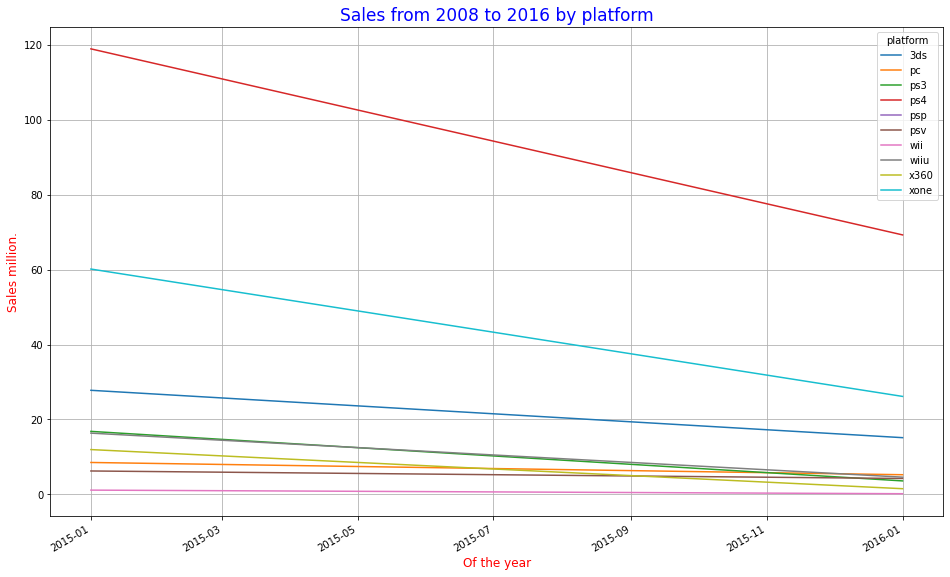

In [82]:
df_with_2015_2016 = df[df['year_of_release'] >='2015-01-01']
pd.pivot_table(df_with_2015_2016, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(16,10))
display(pd.pivot_table(df_with_2015_2016, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum'))
plt.grid(True)
plt.title('Sales from 2008 to 2016 by platform', fontsize=17, color='blue')
plt.xlabel('Of the year',fontsize=12, color='red')
plt.ylabel('Sales million.',fontsize=12, color='red')
plt.show()

# Step 5. General conclusion
#### Step 1:

- The file opens correctly does not require structural adjustments

#### Step 2:

** When preparing data **
- correction of the column names is required,
- removed missing values ​​in the year_of_release column, their number is small on the result will not have an impact
- in the column 'user_score' the value 'tbd' is replaced by None The abbreviation 'tbd' that is, To Be Determined, which means "will definitely", the column itself is converted to float format
- reduced to lower case the strings "name", "platform", 'genre'
- the year_of_release column has been converted to time format
- the gaps in the ratings have not been replaced since they do not yet affect the final result

#### Step 3:

- Until 2008, the number of games released annually grew steadily, since 2008 we have seen a decline due to the transition of the gaming industry to mobile platforms.
- The largest sales for the entire existence of gaming platforms were provided by the Sony ps2 console
display (df_more_sale_platform.sort_values (by = 'total_sales', ascending = False) .head (11))
- The most frequent period for which new platforms appear and old platforms disappear is approximately 10-12 years, while the average value is 7 years
- In the period from 2008 to 2016, the sales leaders are as follows

Platform | total revenues 
----------|----------  
ps3      |	837.19
x360 |805.96  
wii |	601.26
ds	|388.60
ps4	|314.14
3ds|	257.81
xone|	159.32
pc|	151.29
psp|	136.3

- Revenue for all platforms is falling as there is an overflow to mobile platforms
- Data on global game sales by platform is very scattered, almost all of the most profitable projects with high revenues are outside the mustache in the emission zone
- the difference in average sales is also large
- the first three platforms are leading by a very large margin
- Sales within the longest-lived PC platform are influenced by user reviews and critics as follows: there is a correlation between user ratings and critics ratings
- there is no significant correlation between user and critic reviews and the level of sales
The data on other platforms is similar.
- it is clear that there is a correlation between the rating of users and critics
- there is a correlation between the estimates and the level of sales, but very little.
(Significant correlation coefficients start at about 0.6 (modulo). Anything below is no correlation.)

**Most profitable genres:**

In [83]:
display(df_genre_reting.head(6))

,genre,total_sales,name_count,total_sales_millon,total_sales_millon2,profit_one_box
0,action,1716.52,3307,12015.0,1.716520e+09,519056.0
1,sports,1309.67,2306,9167.0,1.309670e+09,567940.0
2,shooter,1041.36,1296,7289.0,1.041360e+09,803518.0
3,role-playing,931.08,1481,6517.0,9.310800e+08,628683.0
4,platform,825.55,878,5778.0,8.255500e+08,940261.0
5,misc,790.29,1721,5532.0,7.902900e+08,459203.0


- The most profitable genres that are easier to learn by users are sold better than action, sports, shooter as opposed to adventure, strategy
- Also from the graph 'How many times each copy of the game was sold' you can see that there are genres that, in terms of quantity per copy, are ahead of the general sales leaders, but it is rather important for game manufacturers in which area to start developing a game in order to get the maximum profit per copy from our graph we see that it is most profitable to develop platformers (Mario rules at all times :)))

#### Step 4:
**Most popular platforms (top 5) in regions NA, EU, JP:**
- For North America, it's Microsoft's Xbox and Sony's ps2
Patriotically, Microsoft's prefix and Sony's world leader are among the leaders
- For Europe, this is ps3 from Sony and Xbox from Microsoft
Here the picture is similar, world leaders are leaders and here ahead
- For Japan, it's Ds from Nintendo and ps3 from Sony
In patriotic Japan, local products are logically leading
The difference in sales shares is most likely due to different market sizes, Japan is definitely smaller than America and Europe

**Most popular genres (top 5)**
- action sports shooter for Europe and America and Japan, the leader by a large margin, role-playing, mentality plays a role in the land of the rising sun, they prefer a different theme of games

**Does ESRB rating affect sales in a particular region?**
- Yes, of course, the sales leaders in the regions are games with the same ratings, the more accessible the rating is to the general public, the more the game is sold.
"E" ("Everyone") - "For everyone"
"T" ("Teen") - "Teenagers"
"M" ("Mature") - "For adults"

**Hypothesis Testing:**
- Average user ratings for Xbox One and PC platforms are equal; ** Not confirmed **
- Average user ratings for Action and Sports genres are equal; ** Not confirmed **
_________________________

## Outcome:
**From all of the above, we can conclude that a potentially popular product for which you need to plan sales and advertising campaigns is:**
- Gaming platforms 3ds, pc, ps3, ps4, psv, wii, wiiu, x360, xone
- Game genres action, sports, shooter, platform, misc, role-playing separately for Japan
- ESRB rated games
"E" ("Everyone") - "For everyone"
"T" ("Teen") - "Teenagers"
"M" ("Mature") - "For adults"
- The rating of users and experts practically does not affect the sales of the game, but it is worth looking at it.


#### Recommendations:
- all with a decline in sales on all platforms, pay the most attention to mobile games
- if there is an opportunity to invest in game development, pay attention to platforming shooters and races as bringing maximum sales per unit of production